## Assessment 1 - Counts

In [1]:
#Program that uses a function that counts number of occurances in a list and adds to dictionary
#input['A', 'A', 'B', 'C', 'A']
#result{'A': 3, 'B': 1, 'C': 1} 

In [2]:
input = ['A', 'A', 'B', 'C', 'A']

In [3]:
input

['A', 'A', 'B', 'C', 'A']

Test .count()

In [4]:
input.count('A')

3

In [5]:
input.count('B')

1

Initially I toyed with the idea of for loops and counters, but I realised to just combine 2 lists of my outputs is much simpler. Counting the characters of the "keys" list in the original input. 
Trying to replicate the desired result without furmula.

In [6]:
keys1 = []
countval1 = []

In [7]:
for val in input:
    if val not in keys1:
         keys1.append(val)
keys1

['A', 'B', 'C']

In [8]:
for n in keys1:
    ans = input.count(n)
    countval1.append(ans)
countval1

[3, 1, 1]

I got the below zip method from the below page: method 3.

https://www.geeksforgeeks.org/python-convert-two-lists-into-a-dictionary/

In [9]:
dictout1 = dict(zip(keys1, countval1))

In [10]:
dictout1

{'A': 3, 'B': 1, 'C': 1}

Ok, the desired output has been achieved, this should be pretty simple to put into a function now

In [11]:
def counts(x):
    keys = []
    countval = []
    for val in x:
        if val not in keys:
            keys.append(val)
    for n in keys:
        ans = x.count(n)
        countval.append(ans)
    dictout = dict(zip(keys, countval))
    return dictout

In [12]:
counts(input)

{'A': 3, 'B': 1, 'C': 1}

In [13]:
counts(['A', 'A', 'B', 'C', 'A'])    

{'A': 3, 'B': 1, 'C': 1}

## Assessment 2 - dicerolls

Python function that rolls $k$ number of dice, $n$ times.
Results of the $n$ rolls should be kept in a dictionary with keys,vals == the frequency of each possible outcome i.e 1-12.

Initially I was messsing aroun with 

In [14]:
import numpy as np
import pandas as pd

Simulate 1 dice roll

In [15]:
rng = np.random.default_rng()

Simulate 2 dice rolls

In [16]:
diceroll = rng.integers(1,7, size =[1000,2])

Check the returned array is the right shape

In [17]:
diceroll.shape

(1000, 2)

Create a pandas dataframe from the array, labelling the columns

In [18]:
df = pd.DataFrame(diceroll, columns=["roll1", "roll2"])

Sum the columns to a new column

Summing columns:
https://stackoverflow.com/questions/34023918/make-new-column-in-panda-dataframe-by-adding-values-from-other-columns/34023971

In [19]:
df['sum'] = df.sum(axis=1)

Create a dict of value counts in a dictionary

https://stackoverflow.com/questions/36004976/count-frequency-of-values-in-pandas-dataframe-column

In [20]:
resultcount = df['sum'].value_counts().to_dict()

In [21]:
resultcount

{7: 176,
 8: 143,
 6: 129,
 9: 117,
 5: 102,
 10: 89,
 4: 74,
 11: 61,
 3: 59,
 2: 31,
 12: 19}

Create the function with the arguments $k$ and $n$ and test

In [22]:
def diceroll(k, n):
    dicerl = rng.integers(1,7, size =[n,k])
    df = pd.DataFrame(dicerl, columns=["roll1", "roll2"])
    df['sum'] = df.sum(axis=1)
    rescnt = df['sum'].value_counts().to_dict()
    return rescnt

In [23]:
diceroll(2,1000)

{7: 166,
 6: 132,
 8: 130,
 5: 120,
 9: 116,
 4: 98,
 10: 83,
 3: 50,
 11: 46,
 12: 37,
 2: 22}

### Task 3

Simulating a coin-flip with numpy.random.binomial to 100  and then 1,000 times and plot the results, showing the bell curve.

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
coinres = rng.binomial(1,.50, size = 100)
coinres

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

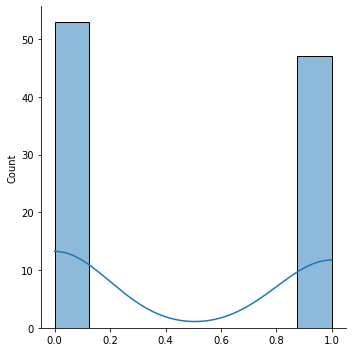

In [37]:
coinres1 = sum(coinres==1)
sns.displot(ax, kde = True)